# Obtendo dados

In [2]:
import requests

#url = "https://apitempo.inmet.gov.br/estacao/2021-06-09/2022-06-09/A201"
url = "https://apitempo.inmet.gov.br/estacao/2022-06-01/2022-06-09/A201"
resultado = requests.get(url)
dados = resultado.json()

# Convertendo em um DataFrame e filtrando

In [4]:
import pandas as pd
import json

dados_str = json.dumps(dados)
dados_tabela = pd.read_json(dados_str)

# Pega somente as colunas necessárias
dados_filtrados = dados_tabela[["DT_MEDICAO","HR_MEDICAO","TEM_INS","UMD_INS","RAD_GLO"]]

# Exclui as horas do dia que ainda não fora medidas (NaN)
# dados_filtrados.drop(dados_filtrados.tail(7).index, inplace=True)

# Filtra radiações negativas para 0
dados_filtrados.loc[dados_filtrados['RAD_GLO'] < 0, 'RAD_GLO'] = 0

print(dados_filtrados)
dados_filtrados.to_csv('dados_inmet_220601_220609.csv')


     DT_MEDICAO  HR_MEDICAO  TEM_INS  UMD_INS  RAD_GLO
0    2022-06-01           0     23.7       98      0.0
1    2022-06-01         100     23.9       98      0.0
2    2022-06-01         200     24.0       98      0.0
3    2022-06-01         300     23.8       98      0.0
4    2022-06-01         400     23.8       98      0.0
..          ...         ...      ...      ...      ...
211  2022-06-09        1900     30.7       74   1748.5
212  2022-06-09        2000     23.3       96    142.9
213  2022-06-09        2100     23.4       97     17.7
214  2022-06-09        2200     23.4       97      1.6
215  2022-06-09        2300     23.3       96      0.0

[216 rows x 5 columns]


# Convertendo para um modelo compativel com Prophet e cria csv


In [45]:
# Transforma os dados em um modelo compativel com o Prophet
# Data e hora para 'ds'
dados_filtrados['ds']=dados_filtrados['HR_MEDICAO'].apply(lambda x: int(x/100)).map('{}:00:00'.format)
dados_filtrados['ds']=dados_filtrados['DT_MEDICAO'] + " " + dados_filtrados['ds']

# Temperatura
dados_filtrados_temperatura = dados_filtrados[["ds", "TEM_INS"]]
dados_filtrados_temperatura.rename(columns={'TEM_INS': 'y'}, inplace=True)
dados_filtrados_temperatura.to_csv('temperatura.csv')

# Umidade
dados_filtrados_umidade = dados_filtrados[["ds", "UMD_INS"]]
dados_filtrados_umidade.rename(columns={'UMD_INS': 'y'}, inplace=True)
dados_filtrados_umidade.to_csv('umidade.csv')

# Radiacao
dados_filtrados_radiacao = dados_filtrados[["ds", "RAD_GLO"]]
dados_filtrados_radiacao.rename(columns={'RAD_GLO': 'y'}, inplace=True)
dados_filtrados_radiacao.to_csv('radiacao.csv')

print(dados_filtrados_umidade)

                       ds      y
0      2021-06-09 0:00:00   99.0
1      2021-06-09 1:00:00  100.0
2      2021-06-09 2:00:00    NaN
3      2021-06-09 3:00:00    NaN
4      2021-06-09 4:00:00    NaN
...                   ...    ...
8772  2022-06-09 12:00:00   78.0
8773  2022-06-09 13:00:00   72.0
8774  2022-06-09 14:00:00   70.0
8775  2022-06-09 15:00:00   69.0
8776  2022-06-09 16:00:00   72.0

[8777 rows x 2 columns]


C:\Users\valvs\AppData\Local\Temp\ipykernel_35312\2372053664.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_filtrados['ds']=dados_filtrados['HR_MEDICAO'].apply(lambda x: int(x/100)).map('{}:00:00'.format)
C:\Users\valvs\AppData\Local\Temp\ipykernel_35312\2372053664.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_filtrados['ds']=dados_filtrados['DT_MEDICAO'] + " " + dados_filtrados['ds']
C:\Users\valvs\AppData\Local\Temp\ipykernel_35312\2372053664.py:8: SettingWithCopyWarning: 
A value i

# Criando um gráfico de comparação

<AxesSubplot:>

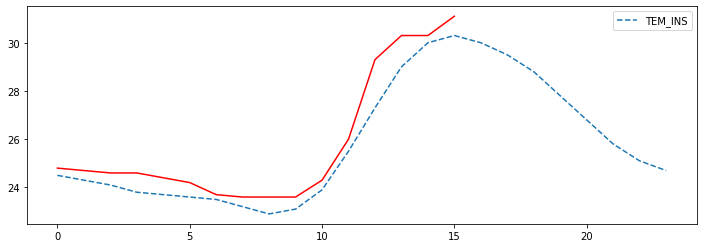

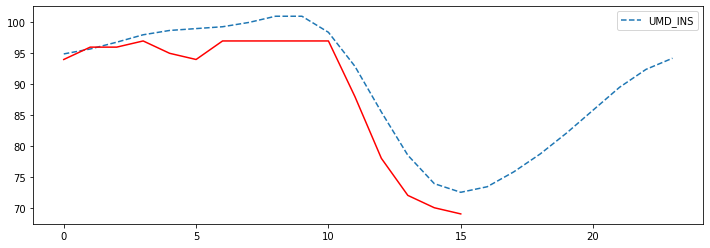

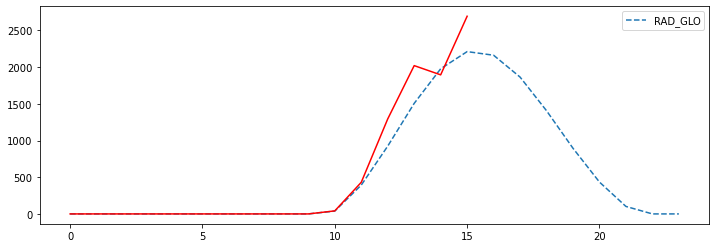

In [42]:
dados_previsao = pd.read_csv('previsao_feito.csv')

# Analise temperatura
ax = dados_previsao.plot(linestyle='--', y='TEM_INS')
plot_temp=dados_filtrados['TEM_INS']
plot_temp.plot(ax=ax,y='TEM_INS', style={'TEM_INS' : 'red'}, figsize=(12,4))

# Analise umidade
ax = dados_previsao.plot(linestyle='--', y='UMD_INS')
plot_temp=dados_filtrados['UMD_INS']
plot_temp.plot(ax=ax,y='UMD_INS', style={'UMD_INS' : 'red'}, figsize=(12,4))

# Analise temperatura
ax = dados_previsao.plot(linestyle='--', y='RAD_GLO')
plot_temp=dados_filtrados['RAD_GLO']
plot_temp.plot(ax=ax,y='RAD_GLO', style={'RAD_GLO' : 'red'}, figsize=(12,4))

